In [3]:
import numpy as np 
import pandas as pd 
import re

In [4]:
import json  # Import library json untuk membaca data dari file JSON

with open('intents.json', 'r') as f:
    data = json.load(f)  # Membaca data dari file JSON dan menyimpannya dalam variabel 'data'

df = pd.DataFrame(data['intents'])  # Membuat DataFrame dari bagian 'intents' dalam data JSON
df

,tag,patterns,responses
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, H...",[Hello there. Tell me how are you feeling toda...
1,morning,[Good morning],[Good morning. I hope you had a good night's s...
2,afternoon,[Good afternoon],[Good afternoon. How is your day going?]
3,evening,[Good evening],[Good evening. How has your day been?]
4,night,[Good night],"[Good night. Get some proper sleep, Good night..."
...,...,...,...
75,fact-28,[What do I do if I'm worried about my mental h...,[The most important thing is to talk to someon...
76,fact-29,[How do I know if I'm unwell?],"[If your beliefs , thoughts , feelings or beha..."
77,fact-30,[How can I maintain social connections? What i...,"[A lot of people are alone right now, but we d..."
78,fact-31,[What's the difference between anxiety and str...,[Stress and anxiety are often used interchange...


In [5]:
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)
        
df = pd.DataFrame.from_dict(dic)
df

,tag,patterns,responses
0,greeting,Hi,[Hello there. Tell me how are you feeling toda...
1,greeting,Hey,[Hello there. Tell me how are you feeling toda...
2,greeting,Is anyone there?,[Hello there. Tell me how are you feeling toda...
3,greeting,Hi there,[Hello there. Tell me how are you feeling toda...
4,greeting,Hello,[Hello there. Tell me how are you feeling toda...
...,...,...,...
227,fact-29,How do I know if I'm unwell?,"[If your beliefs , thoughts , feelings or beha..."
228,fact-30,How can I maintain social connections? What if...,"[A lot of people are alone right now, but we d..."
229,fact-31,What's the difference between anxiety and stress?,[Stress and anxiety are often used interchange...
230,fact-32,What's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap..."


In [6]:
df_responses = df.explode('responses')
all_patterns = ' '.join(df['patterns'])

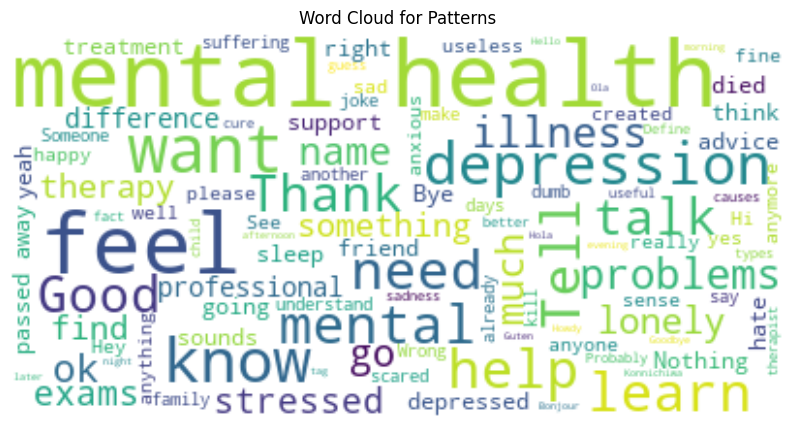

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(all_patterns)

# Display the generated image:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.title('Word Cloud for Patterns')
plt.show()

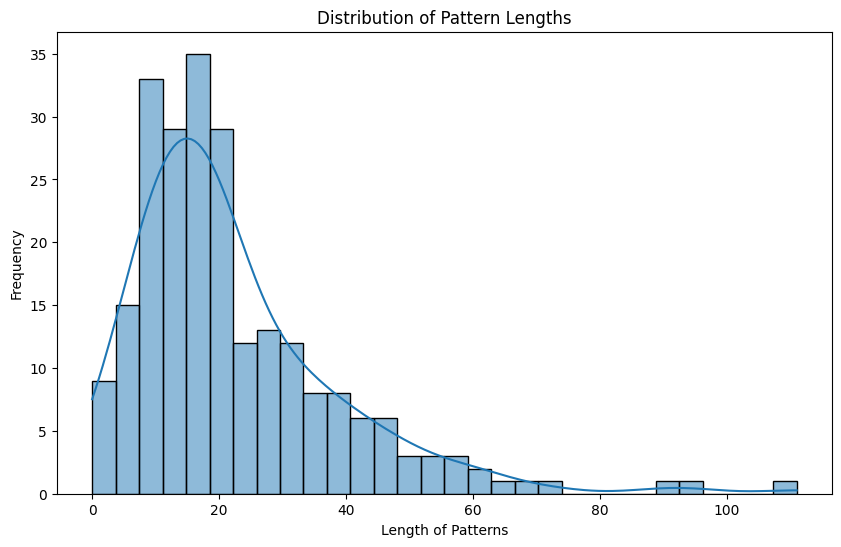

In [8]:
df['pattern_length'] = df['patterns'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['pattern_length'], bins=30, kde=True)
plt.title('Distribution of Pattern Lengths')
plt.xlabel('Length of Patterns')
plt.ylabel('Frequency')
plt.show()

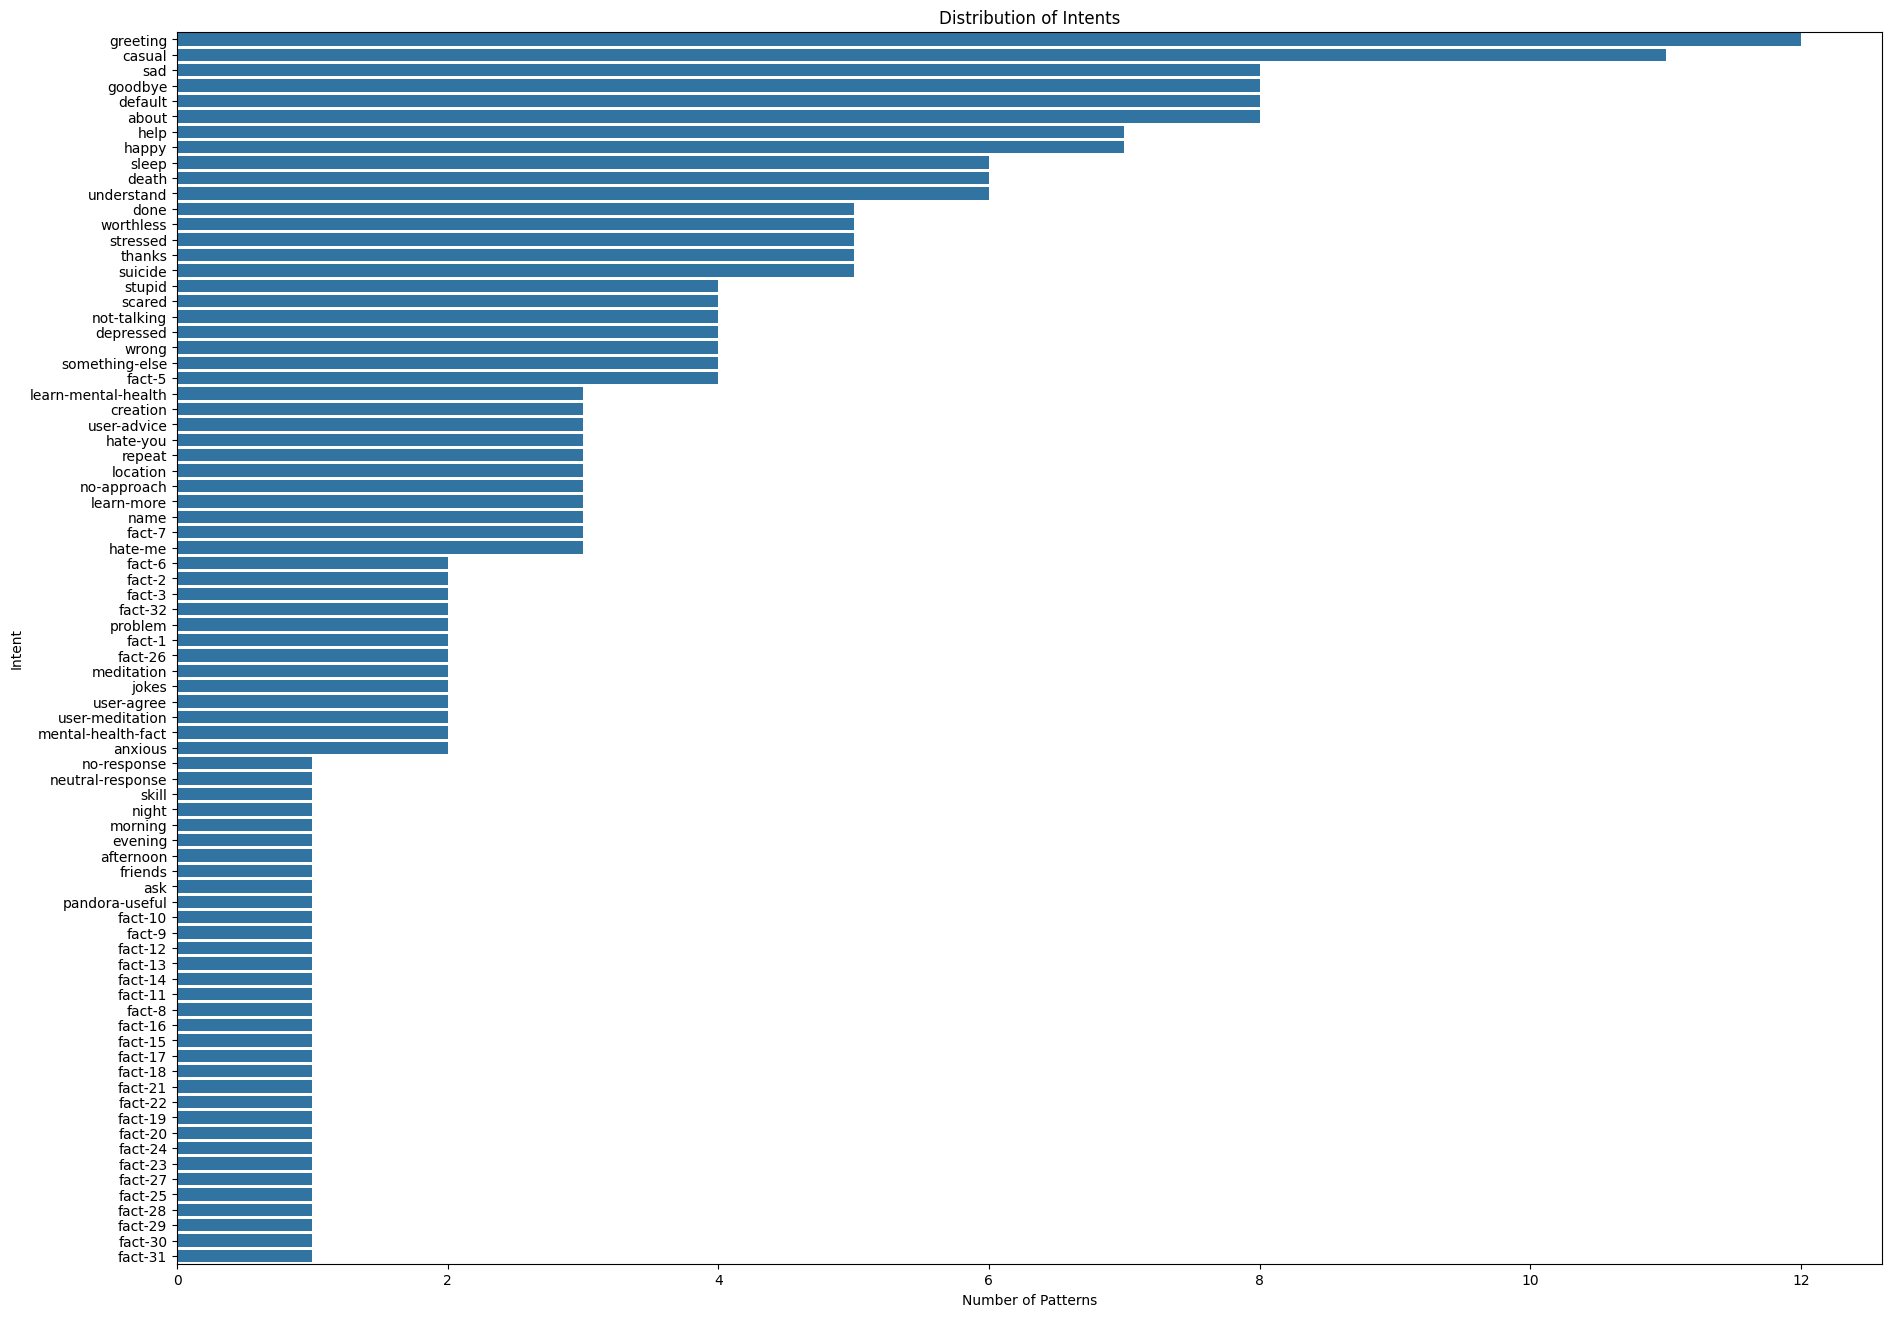

In [9]:
plt.figure(figsize=(22, 16))
sns.countplot(y='tag', data=df, order=df['tag'].value_counts().index)
plt.title('Distribution of Intents')
plt.xlabel('Number of Patterns')
plt.ylabel('Intent')
plt.show()

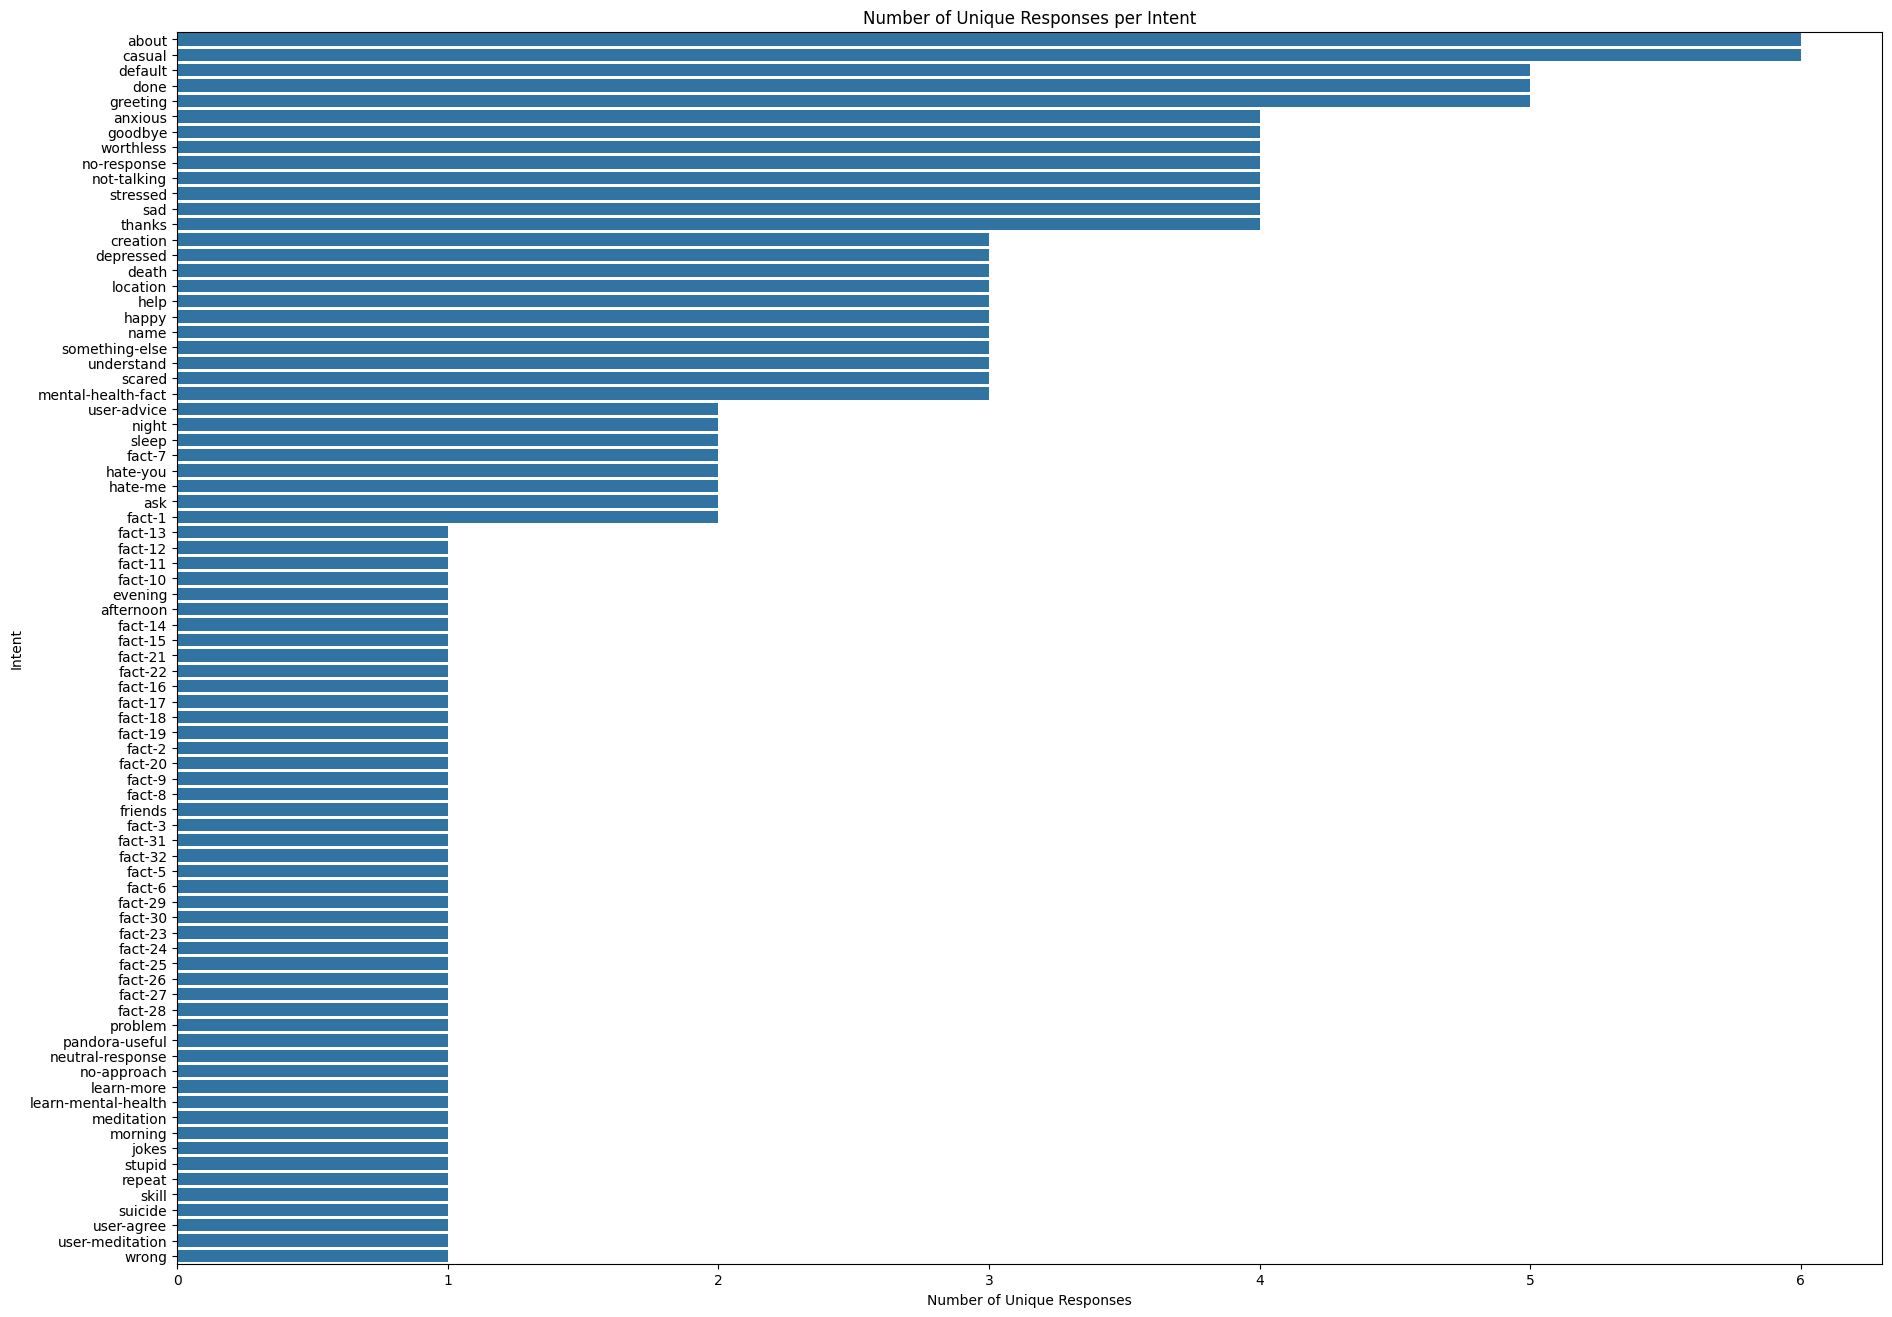

In [10]:
df_unique_responses = df_responses.groupby('tag')['responses'].nunique().reset_index(name='unique_responses')
plt.figure(figsize=(22, 16))
sns.barplot(x='unique_responses', y='tag', data=df_unique_responses.sort_values('unique_responses', ascending=False))
plt.title('Number of Unique Responses per Intent')
plt.xlabel('Number of Unique Responses')
plt.ylabel('Intent')
plt.show()

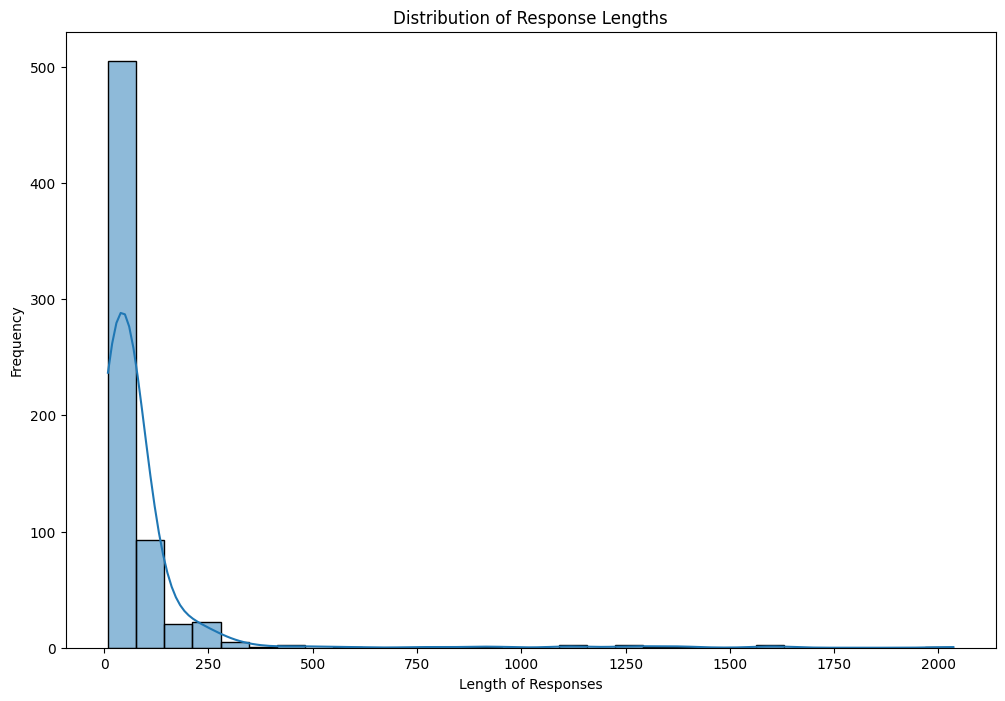

In [11]:
df_responses['response_length'] = df_responses['responses'].apply(len)
plt.figure(figsize=(12, 8))
sns.histplot(df_responses['response_length'], bins=30, kde=True)
plt.title('Distribution of Response Lengths')
plt.xlabel('Length of Responses')
plt.ylabel('Frequency')
plt.show()

In [12]:
def preprocess_text(s):
    s = re.sub('[^a-zA-Z\']', ' ', s)  # Keep only alphabets and apostrophes
    s = s.lower()  # Convert to lowercase
    s = s.split()  # Split into words
    s = " ".join(s)  # Rejoin words to ensure clean spacing
    return s

# Apply preprocessing to the patterns
df['patterns'] = df['patterns'].apply(preprocess_text)
df['tag'] = df['tag'].apply(preprocess_text)
df

,tag,patterns,responses,pattern_length
0,greeting,hi,[Hello there. Tell me how are you feeling toda...,2
1,greeting,hey,[Hello there. Tell me how are you feeling toda...,3
2,greeting,is anyone there,[Hello there. Tell me how are you feeling toda...,16
3,greeting,hi there,[Hello there. Tell me how are you feeling toda...,8
4,greeting,hello,[Hello there. Tell me how are you feeling toda...,5
...,...,...,...,...
227,fact,how do i know if i'm unwell,"[If your beliefs , thoughts , feelings or beha...",28
228,fact,how can i maintain social connections what if ...,"[A lot of people are alone right now, but we d...",61
229,fact,what's the difference between anxiety and stress,[Stress and anxiety are often used interchange...,49
230,fact,what's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap...",53


In [13]:
df['tag'].unique()

array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'no response', 'neutral response', 'about', 'skill',
       'creation', 'name', 'help', 'sad', 'stressed', 'worthless',
       'depressed', 'happy', 'casual', 'anxious', 'not talking', 'sleep',
       'scared', 'death', 'understand', 'done', 'suicide', 'hate you',
       'hate me', 'default', 'jokes', 'repeat', 'wrong', 'stupid',
       'location', 'something else', 'friends', 'ask', 'problem',
       'no approach', 'learn more', 'user agree', 'meditation',
       'user meditation', 'pandora useful', 'user advice',
       'learn mental health', 'mental health fact', 'fact'], dtype=object)

In [14]:
X = df['patterns']
y = df['tag']

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(df['patterns'])
tokenizer.get_config()


{'num_words': None,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 232,
 'word_counts': '{"hi": 2, "hey": 2, "is": 13, "anyone": 2, "there": 5, "hello": 1, "howdy": 1, "hola": 1, "bonjour": 1, "konnichiwa": 1, "guten": 1, "tag": 1, "ola": 1, "good": 5, "morning": 1, "afternoon": 1, "evening": 1, "night": 1, "bye": 3, "see": 2, "you": 38, "later": 1, "goodbye": 1, "au": 1, "revoir": 1, "sayonara": 1, "ok": 4, "then": 1, "fare": 1, "thee": 1, "well": 2, "thanks": 2, "thank": 3, "that\'s": 3, "helpful": 1, "for": 10, "the": 10, "help": 6, "than": 1, "very": 3, "much": 4, "nothing": 3, "who": 6, "are": 15, "what": 29, "tell": 6, "me": 19, "more": 6, "about": 20, "yourself": 3, "your": 3, "name": 4, "should": 3, "i": 95, "call": 1, "what\'s": 3, "can": 16, "do": 14, "created": 2, "how": 8, "were": 2, "made": 1, "my": 13, "am": 17, "go": 4, "by": 1, "could": 2, "give": 1, "a": 12, "hand": 1, "ple

In [16]:
import torch
from torch.utils.data import DataLoader, Dataset, random_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Tokenization and Encoding the Data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_len = 128  # Max sequence length

def encode_texts(texts, max_len):
    input_ids = []
    attention_masks = []
    
    for text in texts:
        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_len,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])
    
    return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0)


# Encoding labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_labels = len(np.unique(y_encoded))

# Encode the patterns
input_ids, attention_masks = encode_texts(X, max_len)
labels = torch.tensor(y_encoded)

# Splitting the dataset into training and validation
dataset = torch.utils.data.TensorDataset(input_ids, attention_masks, labels)
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=16)
validation_dataloader = DataLoader(val_dataset, batch_size=16)

# Model and Optimization
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)
optimizer = AdamW(model.parameters(), lr=2e-5)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\transformers\tokenization_utils_base.py:2673: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the mo

In [17]:
from transformers import get_linear_schedule_with_warmup
from sklearn.metrics import accuracy_score
import torch

# Training parameters
epochs = 50
total_steps = len(train_dataloader) * epochs

# Scheduler
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=total_steps)

# Training loop
for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')
    model.train()
    total_train_loss = 0
    all_predictions = []
    all_labels = []

    for step, batch in enumerate(train_dataloader):
        b_input_ids, b_input_mask, b_labels = batch
        model.zero_grad()
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask, 
                        labels=b_labels)
        loss = outputs.loss
        logits = outputs.logits
        total_train_loss += loss.item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()
        scheduler.step()

        # Collect predictions and true labels for accuracy calculation
        predictions = torch.argmax(logits, axis=1).detach().cpu().numpy()  # Convert logits to class predictions
        all_predictions.extend(predictions)
        all_labels.extend(b_labels.cpu().numpy())  # Actual labels

    # Calculate accuracy
    avg_train_loss = total_train_loss / len(train_dataloader)
    train_accuracy = accuracy_score(all_labels, all_predictions)
    print(f'Average training loss: {avg_train_loss}')
    print(f'Training accuracy: {train_accuracy}')

# Save the model
model.save_pretrained('my_model_bert')

Epoch 1/50


KeyboardInterrupt: 

In [24]:
import random

def inputan_user(pattern):
    # Preprocess input pattern
    text = []
    txt = re.sub('[^a-zA-Z\']', ' ', pattern)
    txt = txt.lower()
    txt = txt.split()
    txt = " ".join(txt)
    text.append(txt)

    # Tokenize and pad the input pattern
    inputs = tokenizer(text, padding=True, truncation=True, max_length=128, return_tensors='tf')
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']

    # Make prediction using the model
    y_pred = model.predict([input_ids, attention_mask])
    y_pred = y_pred.argmax()
    tag = lbl_enc.inverse_transform([y_pred])[0]
    responses = df[df['tag'] == tag]['responses'].values[0]

    # Display user input and bot response
    print("User: {}".format(pattern))
    print(" BOT : {}".format(random.choice(responses)))

In [26]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import numpy as np

# Initialize the model and tokenizer
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # Adjust num_labels as needed
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Example input text
text = 'Hi! How are you?'

# Tokenize the input text
inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)

# Make prediction using the model
with torch.no_grad():  # No need to calculate gradients during inference
    outputs = model(**inputs)
    logits = outputs.logits

# Get the predicted class label
predicted_class = torch.argmax(logits, dim=1).item()

# If you have label encoder (lbl_enc) for decoding, use this:
# tag = lbl_enc.inverse_transform([predicted_class])[0]

print(f"Predicted class: {predicted_class}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Predicted class: 0


In [29]:
# Save the tokenizer
tokenizer.save_pretrained('my_model_bert')

('my_model_bert\\tokenizer_config.json',
 'my_model_bert\\special_tokens_map.json',
 'my_model_bert\\vocab.txt',
 'my_model_bert\\added_tokens.json')

In [33]:
from transformers import TFBertForSequenceClassification, BertTokenizer

# Muat model BERT dan tokenizer dari Hugging Face
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # Sesuaikan num_labels dengan tugas Anda
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
